Số dòng, cột: (103904, 25)
   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2   

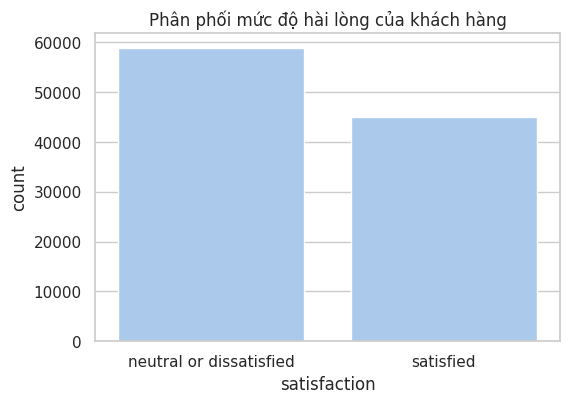

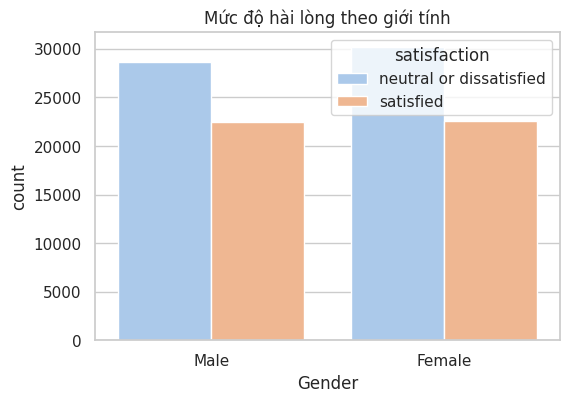

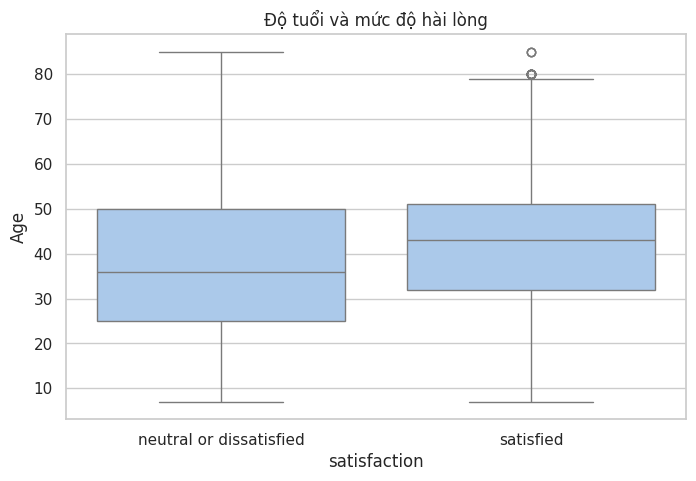

/tmp/ipython-input-1682778588.py:77: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr = df[service_cols + ["satisfaction"]].replace(


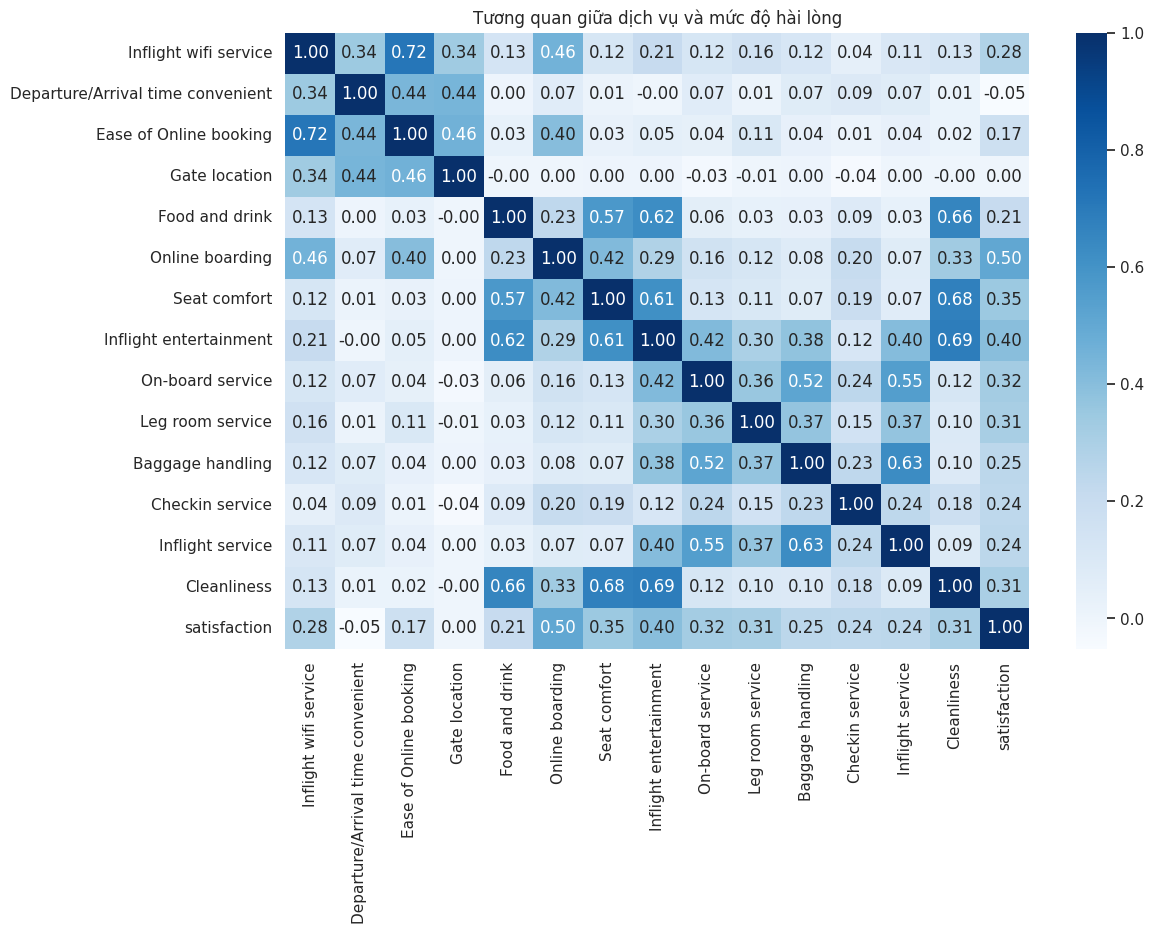


--- Một số phát hiện ban đầu ---
1. Tỷ lệ khách hàng hài lòng: 43.33 %
2. Các yếu tố có tương quan cao với mức độ hài lòng: Inflight service, Cleanliness, Seat comfort...
3. Độ trễ chuyến bay (Departure Delay, Arrival Delay) ảnh hưởng tiêu cực đến hài lòng.


In [ ]:
# ==========================
# Customer Survey Analysis
# ==========================
# Mini Project - CX Data Analyst
# Author: DoTuanKiet
# Date: 2025
# ==========================

# 1. Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tùy chọn hiển thị
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="pastel")

# 2. Load dataset
# Dataset từ Kaggle: Airline Passenger Satisfaction
# Link: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
# Tải file train.csv
df = pd.read_csv("train.csv")

# 3. Khám phá dữ liệu
print("Số dòng, cột:", df.shape)
print(df.head())

print("\nThông tin dữ liệu:")
print(df.info())

print("\nCác giá trị null:")
print(df.isnull().sum())

# 4. Làm sạch dữ liệu
# Điền giá trị thiếu bằng median
df = df.fillna(df.median(numeric_only=True))

# 5. Thống kê mô tả
print("\nPhân phối mức độ hài lòng:")
print(df['satisfaction'].value_counts(normalize=True))

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="satisfaction")
plt.title("Phân phối mức độ hài lòng của khách hàng")
plt.show()

# 6. Phân tích theo đặc điểm khách hàng
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", hue="satisfaction")
plt.title("Mức độ hài lòng theo giới tính")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="satisfaction", y="Age")
plt.title("Độ tuổi và mức độ hài lòng")
plt.show()

# 7. Phân tích yếu tố dịch vụ
# Lấy các cột dịch vụ liên quan
service_cols = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

corr = df[service_cols + ["satisfaction"]].replace(
    {"satisfaction": {"neutral or dissatisfied": 0, "satisfied": 1}}
).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Tương quan giữa dịch vụ và mức độ hài lòng")
plt.show()

# 8. Insight cơ bản
print("\n--- Một số phát hiện ban đầu ---")
print("1. Tỷ lệ khách hàng hài lòng:", round((df['satisfaction'] == "satisfied").mean()*100,2), "%")
print("2. Các yếu tố có tương quan cao với mức độ hài lòng: Inflight service, Cleanliness, Seat comfort...")
print("3. Độ trễ chuyến bay (Departure Delay, Arrival Delay) ảnh hưởng tiêu cực đến hài lòng.")
